In [1]:
#Import the libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Import MNIST Dataset for  training
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [1104]:
train_X = train_X[:20000,:,:]
train_y = train_y[:20000]

In [9]:
# tf Sequential model with 28x28 dimensions
tf.random.set_seed(34)
model = Sequential(
    [
        tf.keras.Input(shape=(28,28)),
        tf.keras.layers.Flatten(),
        Dense(units = 40, activation = 'sigmoid', name="l0"),
        Dense(units = 25, activation = 'sigmoid', name="l1"),
        Dense(units = 10, activation = 'softmax', name="l2")
    ], name="my_model"
)
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l0 (Dense)                      │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l1 (Dense)                      │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,685 (127.68 KB)

 Trainable params: 32,685 (127.68 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training, using ADAM optimizer 
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
)

history = model.fit(
    train_X,train_y,
    epochs=120,
    validation_data=(test_X,test_y),
)

Epoch 1/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - loss: 1.6456 - val_loss: 0.6345
Epoch 2/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 0.5799 - val_loss: 0.4225
Epoch 3/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - loss: 0.4096 - val_loss: 0.3506
Epoch 4/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 0.3513 - val_loss: 0.3267
Epoch 5/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - loss: 0.3190 - val_loss: 0.3080
Epoch 6/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 332us/step - loss: 0.3010 - val_loss: 0.2803
Epoch 7/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 333us/step - loss: 0.2952 - val_loss: 0.2824
Epoch 8/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 331us/step - loss: 0.2794 - val_loss: 0.2636
Epoch 9/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 344us/step - loss: 0.2693 - val_loss: 0.2568
Epoch 10/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - loss: 0.2620 - val_loss: 0.2580
Epoch 11/120
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 334us/step - loss: 0.2531 - val_loss: 0.23

In [13]:
# Evaluating the model from test set

results = model.evaluate(test_X, test_y, batch_size=256)
predictions = model.predict(test_X[:test_y.shape[0]])

j = 0 
count=0
for i in predictions:
    if(np.argmax(i)!=test_y[j]):
        count+=1
    j+=1
print(f"\n{count}/{test_y.shape[0]} Wrong Predictions,\n{test_y.shape[0]-count}/{test_y.shape[0]} Right Predictions,\nLoss = {results}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 0.1663
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step

431/10000 Wrong Predictions,
9569/10000 Right Predictions,
Loss = 0.14438116550445557


Text(0, 0.5, 'Loss')

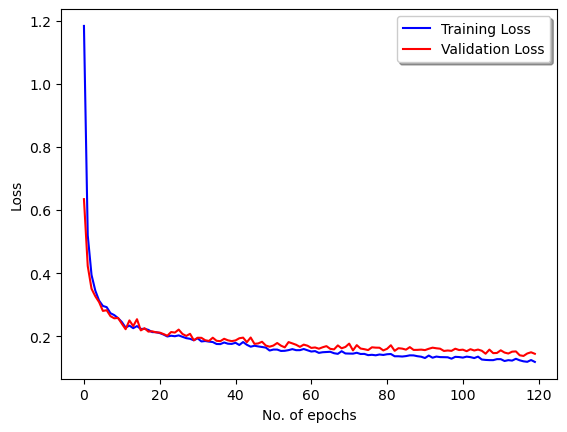

In [15]:
# Plot Loss function with epochs

fig, ax = plt.subplots(1,1)
ax.plot(history.history['loss'], color='b', label="Training Loss")
ax.plot(history.history['val_loss'], color='r', label="Validation Loss")
legend = ax.legend(loc='best', shadow=True)

plt.xlabel('No. of epochs')
plt.ylabel('Loss')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
 predictions = [[6.0116037e-08 6.1233802e-04 9.9925274e-01 2.8919780e-05 1.1266325e-06
  1.0218361e-07 3.0285159e-07 9.3644696e-05 1.0760973e-05 1.6374725e-09]]
 Largest probability: 2


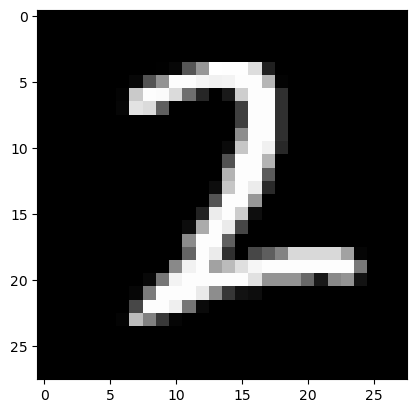

In [25]:
#Predicting a value from the test set (MNIST)

example = 1336

image = test_X[example]
plt.imshow(test_X[example], cmap=plt.get_cmap('gray'))

prediction = model.predict(image.reshape(1,28,28))  # prediction

print(f" predictions = {prediction}")
print(f" Largest probability: {np.argmax(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Predicted Value = 6


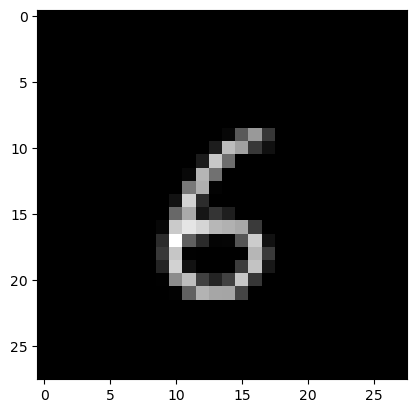

In [29]:
#Predicting from own data
image = tf.keras.utils.load_img(
            'test_images/6.png',
            color_mode="grayscale",
            interpolation="nearest",
            keep_aspect_ratio=False,
        )
image = image.resize([28,28])
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr[:,:,0]
plt.imshow(input_arr, cmap=plt.get_cmap('gray'))

arr = input_arr.reshape(1,28,28)
predictions = model.predict(arr)
print(f"\nPredicted Value = {np.argmax(predictions)}")